In [2]:
import numpy as np
import xgboost as xgb
import pandas as pd
from xgboost.sklearn import XGBRegressor
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
def day_to_float(dates:'numpy array of strings with format YYYY-MM-DD'):
    new_d = []
    for i in dates:
        date_arr = list(map(float,i.split('-')))
        new_d.append(date_arr[0]+date_arr[1]/12+date_arr[2]/(12*31))
    return np.array(new_d)

In [4]:
def clean_data(X):
    for i in range(2,len(X[0,:])):
        if isinstance(X[0,i],str):
            ind.append(i)
    fu = np.array([None]*len(ind))
    for j in range(len(ind)):
        l = []
        for i in range(len(X[:,ind[j]])):
            if not isinstance(X[i,ind[j]],float):
                l.append(i)
        fu[j] = np.array(l)
    print(X[:,1])

    for i in range(len(ind)):
        mod1 = LabelEncoder()
        A = X[:,ind[i]][fu[i]]
        mod1.fit(A)
        X[:,ind[i]][fu[i]] = mod1.transform(X[:,ind[i]][fu[i]])

    X[:,1] = day_to_float(X[:,1])
    I = sklearn.preprocessing.Imputer(missing_values=float('nan'),strategy='most_frequent',axis=0)
    X = I.fit_transform(X)
    return X

In [6]:
train = pd.read_csv('/home/xcho/Desktop/AnacondaProjects/Houses/train.csv')
print(np.array(train).shape)
ind = []
X = np.array(train)
print(X.shape[0])
X = clean_data(X)

(30471, 292)
30471
['2011-08-20' '2011-08-23' '2011-08-27' ... '2015-06-30' '2015-06-30'
 '2015-06-30']


In [7]:
n_data = X.shape[0]

indices = np.arange(n_data)
np.random.shuffle(indices)
print(indices)

[29442  8116  1759 ... 19750 29014  1586]


In [8]:
X_s = X[indices,:]
test_count = n_data*30//100
train_count = n_data-test_count
print(n_data, test_count,train_count)
X_train = X_s[:,1:-1]
y_train = X_s[:,-1]

X_test = X_s[:test_count:,1:-1]
y_test = X_s[:test_count,-1]

30471 9141 21330


In [9]:
print(X_train.shape,y_train.shape)

(30471, 290) (30471,)


In [10]:
x = XGBRegressor()

In [11]:
model = x.fit(X_train,y_train)

In [12]:
model.score(X_train,y_train)

0.733340568134585

[]

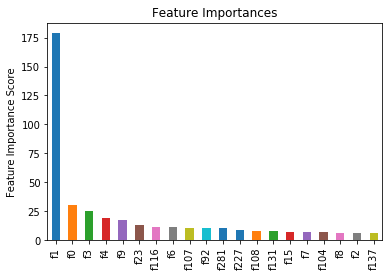

In [13]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)[0:20]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.plot()

[53. 84. 37. ... 38. 51. 45.]


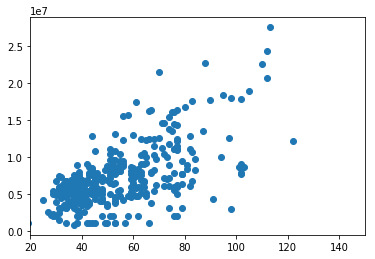

In [14]:

plt.scatter(X_train[:400,1], y_train[:400])
plt.xlim(20,150)
plt.plot()


print(X_train[:,1])

In [15]:
from sklearn import linear_model

In [16]:
#X_train = scale(X_train)
regression = linear_model.Lasso(alpha=0.1)
regression.fit(X_train[:,1].reshape(-1,1),y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
print(np.mean((regression.predict(X_train[:,1].reshape(-1,1))-y_train)**2))
y_train2 =y_train- regression.predict(X_train[:,1].reshape(-1,1))

20178730207710.832


In [18]:
x = XGBRegressor(learning_rate=0.1,n_estimators=100,max_depth=7)
X_train2 = np.hstack([X_train[:,0].reshape(-1,1),X_train[:,2:]])
print(X_train2.shape)
model = x.fit(X_train2,y_train2)

(30471, 289)


In [19]:
print(model.score(X_train2,y_train2))
#print(model.score(X_test2,y_test))

0.8362034204047546


In [20]:
#model.get_booster().get_fscore()

[0, 1, 2, 5, 7, 6, 3, 87, 88, 83, 10, 101, 8, 90, 129, 91, 141, 93, 4, 123, 103, 9, 138, 126, 149, 145, 115, 89, 134, 146, 128, 244, 139, 110, 151, 95, 144, 106, 136, 147, 84, 11, 127, 85, 14, 119, 133, 132, 82, 142, 143, 174, 124, 204, 158, 271, 125, 248, 200, 197, 130, 140, 137, 94, 221, 117, 267, 122, 131, 227, 97, 113, 98, 175, 243, 22, 225, 13, 135, 148, 92, 12, 202, 99, 266, 280, 246, 198, 16, 220, 181, 105, 114, 39, 264, 180, 179, 257, 273, 121, 71, 100, 108, 250, 269, 281, 223, 187, 256, 231, 226, 159, 107, 164, 177, 272, 186, 233, 201, 79, 111, 224, 176, 251, 157, 162, 188, 20, 247, 67, 66, 234, 254, 276, 25, 72, 203, 152, 163, 208, 232, 288, 172, 210, 29, 178, 274, 154, 211, 48, 190, 74, 245, 195, 19, 261, 80, 209, 228, 215, 287, 184, 70, 192, 182, 156, 270, 258, 242, 205, 81, 26, 237, 196, 284, 78, 279, 27, 241, 23, 17, 249, 68, 219, 252, 255, 49, 282, 253, 235, 15, 259, 218, 199, 118, 150, 185, 45, 278, 283, 229, 275, 222, 212, 206, 263, 240, 171, 120, 30, 260, 47, 40, 161,

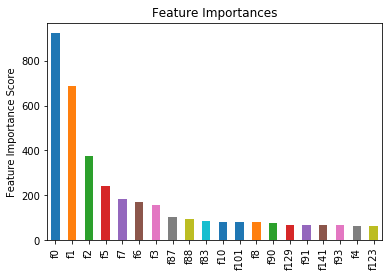

In [21]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)[0:20]
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.plot()
data = model.get_booster().get_fscore()
str_ind = sorted(data.items(), key=lambda x:x[1],reverse=True) 
int_ind = []
for i,j in str_ind:
    int_ind.append(int(i[1:]))
print(int_ind)

In [22]:
import tensorflow as tf

/home/xcho/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [23]:
dropout=0.25
tf.reset_default_graph()
X_t = tf.placeholder(shape=[None,22],dtype='float32')
y_t = tf.placeholder(shape=[None,1],dtype='float32')
alpha = tf.placeholder(shape=(),dtype='float32')
flat = tf.layers.flatten(inputs=X_t)
layer1 = tf.layers.dense(inputs = flat,units=128,activation=tf.nn.relu)
d1 = tf.layers.dropout(layer1, rate=dropout)

layer2 = tf.layers.dense(inputs = d1,units=128,activation=tf.nn.relu)
d2 = tf.layers.dropout(layer2, rate=dropout)

layer3 = tf.layers.dense(inputs = d2,units=64,activation=tf.nn.relu)
d3 = tf.layers.dropout(layer3, rate=dropout)

layer4 = tf.layers.dense(inputs = d3,units=32,activation=tf.nn.relu)
pred = tf.layers.dense(inputs = layer4,units=1,activation=tf.nn.relu)

loss = tf.nn.l2_loss(tf.log(pred+1.0E-8)-tf.log(y_t+1.0E-8))*2


step = tf.train.AdamOptimizer(alpha).minimize(loss)

In [24]:
print(X_train.shape)
print(X_train2.shape)
print(y_train.shape)
print(y_train2.shape)
X_nn = np.hstack([X_train[:,int_ind[:20]],model.predict(X_train2).reshape(-1,1),regression.predict(X_train[:,1].reshape(-1,1)).reshape(-1,1)])
print(X_nn.shape)


X_test2 = np.hstack([X_test[:,0].reshape(-1,1),X_test[:,2:]])
X_nn_test = np.hstack([X_test[:,int_ind[:20]],model.predict(X_test2).reshape(-1,1),regression.predict(X_test[:,1].reshape(-1,1)).reshape(-1,1)])


(30471, 290)
(30471, 289)
(30471,)
(30471,)
(30471, 22)


In [26]:
from scipy.io import loadmat
from scipy.io import savemat
model_path = "tmp/model.ckpt"
saver = tf.train.Saver()
print(train_count)
n_batch = 32
n_epoch = 3
a_val = 0.001
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    minibatches = range(0,train_count-n_batch+1,n_batch)
    minibatch_c = len(list(minibatches))
    print((minibatch_c*n_batch/2))
    losses = []
    test_losses = []
    for ep in range(n_epoch):
        loss_val_ep = 0
        for i in minibatches:
            [loss_val] = sess.run([loss],feed_dict={X_t:X_nn[i:i+n_batch,:],y_t:y_train[i:i+n_batch].reshape(-1,1)})
            sess.run([step],feed_dict={X_t:X_nn[i:i+n_batch,:],y_t:y_train[i:i+n_batch].reshape(-1,1),alpha:a_val})
            loss_val_ep+=loss_val
        losses.append((loss_val_ep/(minibatch_c*n_batch))**0.5)
        
       # [test_loss_val] = sess.run([loss],feed_dict={X_t:X_nn_test,y_t:y_test.reshape(-1,1)})
       # test_losses.append((test_loss_val/y_test.shape[0])**0.5)
        #print('for epoch {0} train loss is {1} test loss is {2}'.format(ep,losses[-1],test_losses[-1]))
        print('for epoch {0} train loss is {1}'.format(ep,losses[-1]))
        if(ep%1==0):
            save_path = saver.save(sess, model_path)
            print("Model saved in file: %s" % save_path)
        if(ep==150):
            a_val/=10
        

21330
10656.0
for epoch 0 train loss is 0.4931679269457029
Model saved in file: tmp/model.ckpt
for epoch 1 train loss is 0.4145827028635028
Model saved in file: tmp/model.ckpt
for epoch 2 train loss is 0.41462507261173054
Model saved in file: tmp/model.ckpt


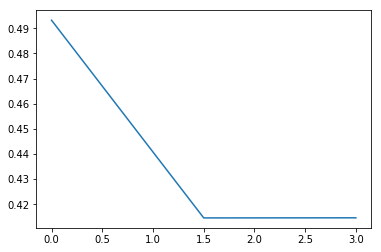

In [27]:
plt.plot(np.linspace(0,len(losses),len(losses)),losses)
#plt.plot(np.linspace(0,len(losses),len(losses)),test_losses)
plt.show()

In [28]:
print(pred)
print(flat)

print(layer1)

print(layer2)
print(layer3)
print(layer4)

print(y_t)

Tensor("dense_4/Relu:0", shape=(?, 1), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 22), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 128), dtype=float32)
Tensor("dense_1/Relu:0", shape=(?, 128), dtype=float32)
Tensor("dense_2/Relu:0", shape=(?, 64), dtype=float32)
Tensor("dense_3/Relu:0", shape=(?, 32), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


In [30]:
test_f = pd.read_csv('/home/xcho/Desktop/AnacondaProjects/Houses/test.csv')
X_final = np.array(test_f)
print(X_final)
X_final = clean_data(X_final)

[[30474 '2015-07-01' 39.0 ... 0 14 1]
 [30475 '2015-07-01' 79.2 ... 1 12 1]
 [30476 '2015-07-01' 40.5 ... 10 71 11]
 ...
 [38133 '2016-05-30' 41.08 ... 105 203 13]
 [38134 '2016-05-30' 34.8 ... 2 43 10]
 [38135 '2016-05-30' 63.0 ... 4 42 11]]
['2015-07-01' '2015-07-01' '2015-07-01' ... '2016-05-30' '2016-05-30'
 '2016-05-30']


In [31]:
X_final = X_final[:,1:]

In [32]:


y_reg = regression.predict(X_final[:,1].reshape(-1,1))
X_xgb = np.hstack([X_final[:,0].reshape(-1,1),X_final[:,2:]])
print(X_final.shape)

print(X_xgb.shape)


X_nn_final = np.hstack([X_final[:,int_ind[:20]],model.predict(X_xgb).reshape(-1,1),regression.predict(X_final[:,1].reshape(-1,1)).reshape(-1,1)])

with tf.Session() as sess:
    saver.restore(sess, model_path)
    [pred_val] = sess.run([pred],feed_dict={X_t:X_nn_final})

(7662, 290)
(7662, 289)
INFO:tensorflow:Restoring parameters from tmp/model.ckpt


In [34]:
sub = pd.read_csv('/home/xcho/Desktop/AnacondaProjects/Houses/sample_submission.csv')

In [35]:
sub['price_doc'] = pred_val

In [36]:
sub.to_csv('/home/xcho/Desktop/AnacondaProjects/Houses/sample_submission4.csv',index=False)